## Analysis of Soccer Database by Adel Samir
### Dataset contains:
+25,000 matches

+10,000 players

11 European Countries with their lead championship

Seasons 2008 to 2016

Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates

Team line up with squad formation (X, Y coordinates)

Betting odds from up to 10 providers

Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

### Importing, cleaning and connecting tables into DataFrame

In [27]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
conn = sql.connect('database.sqlite')

In [29]:
country = pd.read_sql_query("SELECT * FROM Country", conn)
league = pd.read_sql_query("SELECT * FROM League", conn)
match = pd.read_sql_query("SELECT * FROM Match", conn)
player = pd.read_sql_query("SELECT * FROM Player", conn)
player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
team = pd.read_sql_query("SELECT * FROM Team", conn)
team_attr = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

In [30]:
# merging the Country and Leauge in one DataFrame
df8 = pd.merge(country,league,on="id")

#Renaming columns to correct naming
df8 = df8.rename(columns={'name_x': 'country', 'name_y': 'leaugue'})

#dropping id column (unnessesary)
df8.pop('id')
df8

,country,country_id,leaugue
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A
5,Netherlands,13274,Netherlands Eredivisie
6,Poland,15722,Poland Ekstraklasa
7,Portugal,17642,Portugal Liga ZON Sagres
8,Scotland,19694,Scotland Premier League
9,Spain,21518,Spain LIGA BBVA


In [31]:
# merging the Country and Leauge and Matches in one DataFrame
match_all = pd.merge(match,df8,on="country_id")

#dropping id, country_id,league_id columns (unnessesary)
match_all = match_all.drop(['id','country_id','league_id'],axis=1)
match_all.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,leaugue
0,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Belgium,Belgium Jupiler League
1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Belgium,Belgium Jupiler League
2,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Belgium,Belgium Jupiler League
3,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Belgium,Belgium Jupiler League
4,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,Belgium,Belgium Jupiler League


In [32]:
tmp1 = team[['team_api_id','team_short_name','team_long_name']]
tmp2 = team[['team_api_id','team_short_name','team_long_name']]

tmp1 = tmp1.rename(columns={'team_api_id': 'home_team_api_id'})
tmp2 = tmp2.rename(columns={'team_api_id': 'away_team_api_id'})

# Adding team names on the matches both sides
match_all = pd.merge(match_all,tmp1,on="home_team_api_id")
match_all = pd.merge(match_all,tmp2,on="away_team_api_id")

match_all.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,...,GBA,BSH,BSD,BSA,country,leaugue,team_short_name_x,team_long_name_x,team_short_name_y,team_long_name_y
0,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,...,4.00,1.73,3.4,4.2,Belgium,Belgium Jupiler League,GEN,KRC Genk,BAC,Beerschot AC
1,2009/2010,5,2009-08-30 00:00:00,665353,9987,9993,1,1,1.0,2.0,...,3.75,1.83,3.3,3.8,Belgium,Belgium Jupiler League,GEN,KRC Genk,BAC,Beerschot AC
2,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,1,1.0,3.0,...,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,GEN,KRC Genk,BAC,Beerschot AC
3,2011/2012,1,2011-07-30 00:00:00,1032694,9987,9993,3,1,1.0,2.0,...,6.25,1.44,4.0,6.5,Belgium,Belgium Jupiler League,GEN,KRC Genk,BAC,Beerschot AC
4,2012/2013,11,2012-10-20 00:00:00,1224064,9987,9993,3,0,1.0,2.0,...,5.50,1.53,3.8,5.5,Belgium,Belgium Jupiler League,GEN,KRC Genk,BAC,Beerschot AC


In [33]:
player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [34]:
#dropping  home_team_api_id, away_team_api_id, match_api_id columns (unnessesary)

match_all = match_all.drop(['home_team_api_id','away_team_api_id','match_api_id'],axis=1)
match_all = match_all.rename(columns={'team_short_name_x': 'home_team_short_name',
                          'team_short_name_y': 'away_team_short_name',
                         'team_long_name_x': 'home_team_long_name',
                         'team_long_name_y': 'away_team_long_name'})

<a id='eda'></a>
## Exploratory Data Analysis



### How does playing home or away affects the team performance?

In [35]:
# selecting the relevant columns from the dataframe to answer this question
df_q1 = match_all[['date', 'home_team_goal', 'away_team_goal','home_team_short_name', 'away_team_short_name' ]]
df_q1.head()

,date,home_team_goal,away_team_goal,home_team_short_name,away_team_short_name
0,2008-08-17 00:00:00,1,1,GEN,BAC
1,2009-08-30 00:00:00,1,1,GEN,BAC
2,2010-08-01 00:00:00,2,1,GEN,BAC
3,2011-07-30 00:00:00,3,1,GEN,BAC
4,2012-10-20 00:00:00,3,0,GEN,BAC


In [36]:
# creating new columns indicating if the team won the match or not
df_q1['home_win'] = np.select([df_q1['home_team_goal'] > df_q1['away_team_goal']],
                              [df_q1['home_team_goal'] > df_q1['away_team_goal']], default=0)
df_q1['away_win'] = np.select([df_q1['home_team_goal'] < df_q1['away_team_goal']],
                              [df_q1['home_team_goal'] < df_q1['away_team_goal']], default=0)
df_q1.head()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date,home_team_goal,away_team_goal,home_team_short_name,away_team_short_name,home_win,away_win
0,2008-08-17 00:00:00,1,1,GEN,BAC,0,0
1,2009-08-30 00:00:00,1,1,GEN,BAC,0,0
2,2010-08-01 00:00:00,2,1,GEN,BAC,1,0
3,2011-07-30 00:00:00,3,1,GEN,BAC,1,0
4,2012-10-20 00:00:00,3,0,GEN,BAC,1,0


In [37]:

df_q1['date'] = pd.to_datetime(df_q1['date'])

# split date column in year month and day
df_q1['day'] = df_q1['date'].dt.day
df_q1['month'] = df_q1['date'].dt.month
df_q1['year'] = df_q1['date'].dt.year

# popping irrelevent columns
df_q1.pop('home_team_goal')
df_q1.pop('away_team_goal')
df_q1.pop('date')

df_q1.head()

C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

,home_team_short_name,away_team_short_name,home_win,away_win,day,month,year
0,GEN,BAC,0,0,17,8,2008
1,GEN,BAC,0,0,30,8,2009
2,GEN,BAC,1,0,1,8,2010
3,GEN,BAC,1,0,30,7,2011
4,GEN,BAC,1,0,20,10,2012


In [38]:
# aggregating the home and awy wins
result_q1 = df_q1.groupby(['year']).agg({'home_win':'sum','away_win':'sum'})
result_q1

,home_win,away_win
year,,
2008,779,442
2009,1531,938
2010,1533,876
2011,1510,899
2012,1477,961
2013,1420,910
2014,1442,939
2015,1504,1003
2016,721,498


displayed are the sum of wins for home and away teams across all the years. 2010 was top year for home teams whereas 2015 is the top season for the away teams.

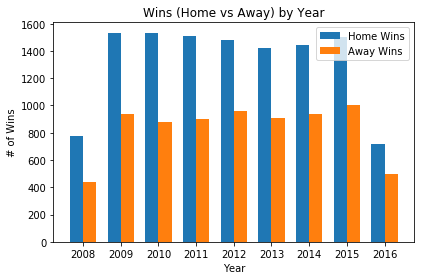

In [39]:
# plotting result of q1

labels = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
home_win =  result_q1['home_win']
away_win = result_q1['away_win']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, home_win, width, label='Home Wins')
rects2 = ax.bar(x + width/2, away_win, width, label='Away Wins')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of Wins')
ax.set_xlabel('Year')
ax.set_title('Wins (Home vs Away) by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

According to the previous bar chart, wins ( home and away) have interestingly risen starting 2009 and kept a steady level until 2016 and suddenly dropped.

### How matches and goals distributed based on the Leauge?

In [40]:
# getting the needed columns to analyse in  question 2 (q2)
q2 = match_all[['leaugue','away_team_goal','home_team_goal']]
q2.describe()

,away_team_goal,home_team_goal
count,25979.000000,25979.000000
mean,1.160938,1.544594
std,1.142110,1.297158
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,10.000000


In [41]:
# check for null values
q2.isna().sum()

leaugue           0
away_team_goal    0
home_team_goal    0
dtype: int64

In [42]:
# check the shape of the dataframe
q2.shape

(25979, 3)

In [43]:
q2.head()

,leaugue,away_team_goal,home_team_goal
0,Belgium Jupiler League,1,1
1,Belgium Jupiler League,1,1
2,Belgium Jupiler League,1,2
3,Belgium Jupiler League,1,3
4,Belgium Jupiler League,0,3


In [44]:
# function to calculate goals scored in different leagues
def goal_scores(column = ""):
    plt.figure(figsize=(8,6));
    q2.groupby('leaugue')[column].sum().plot(kind='bar')
    # complete here and add new parameters to the function if you think it's necessary
    plt.xlabel('League')
    plt.ylabel('Number of goals')
    plt.title('Goals scored by teams in different leagues');

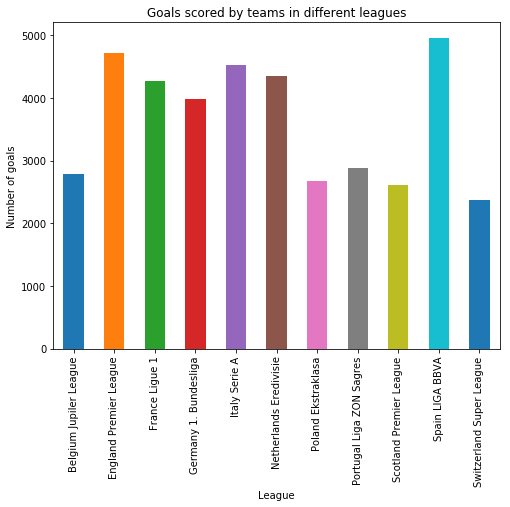

In [45]:
# goals scored by home teams in different leaugeus
goal_scores('home_team_goal')

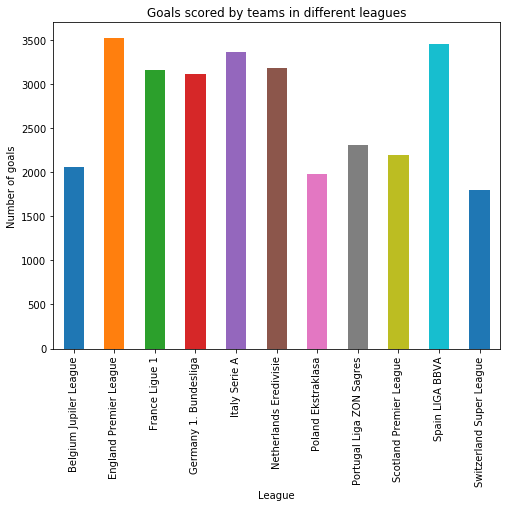

In [46]:
# goals scored in different leagues by away teams
goal_scores('away_team_goal')

Goals scored home (with upper limit of 5000) are much more than goals scored while away (with upper limit of 3500). However, both follow the same distribution across leagues of rising and falling for specific leagues. For example, goals in Spanish league are the highest whether home or away.

Text(0.5, 0, 'Number of Matches')

<Figure size 576x432 with 0 Axes>

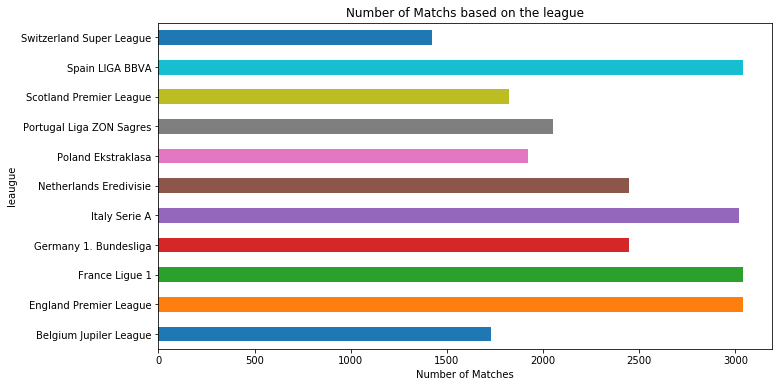

In [47]:
# goals scored in different leagues by away teams
plt.figure(figsize=(8,6));
q2.groupby('leaugue').count().plot.barh(y='away_team_goal', figsize=(11, 6),legend=False)
plt.title('Number of Matchs based on the league');
plt.xlabel('Number of Matches')

This represents the match distribution based on the leagues. It's interesting to connect with the number of goals distribution because for example the top two performers in number of goals are Spain LIGA BBVA and England Premier league and when looking at the number of matches they are the highest, too. So, it's logical to have more goals. But it's not the same case for France Ligue 1 where they had almost the same number of matches but less goals than the other leagues, so this indicates that level of competition between teams in this league is high enough to produce less goals.

### What are the top 10 performing teams (Home Vs Away)?

Text(0.5, 1.0, 'Top 10 Home Teams goal distribution')

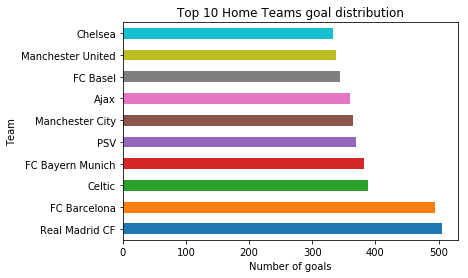

In [48]:
#selecting the top 10 teams performancing at home
match_all.groupby('home_team_long_name').home_team_goal.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Number of goals')
plt.ylabel('Team')
plt.title('Top 10 Home Teams goal distribution')

Text(0.5, 1.0, 'Top 10 Away Teams goal distribution')

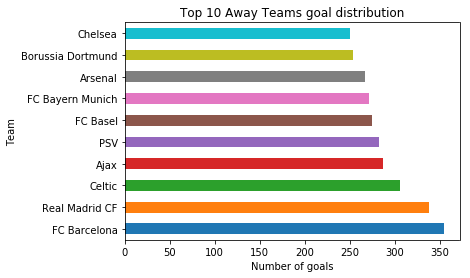

In [49]:
#selecting the top 10 teams performancing away
match_all.groupby('away_team_long_name').away_team_goal.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Number of goals')
plt.ylabel('Team')
plt.title('Top 10 Away Teams goal distribution')

Based on the goals distribution by leagues, it's logical to find Spanish teams on top of performing ones by goals. Since Span LIGA BBVA is the top by goals. But interesting trend is to see Spanish teams over performance when playing home. This indicates that Spanish teams have more power when playing among their supporters 

### Observing the distribution of the goals scored by away and home teams (1d exploration)

Text(0.5, 1.0, 'Histogram of Goals for Home Teams')

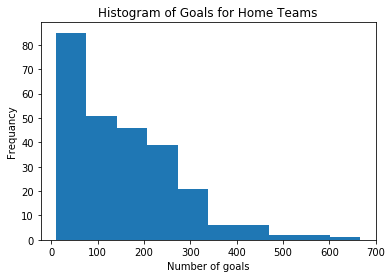

In [50]:
#creating a histogram to observe the distribution of the number of goals for the home teams
match_all.groupby('home_team_short_name').sum().home_team_goal.plot.hist()
plt.xlabel('Number of goals')
plt.ylabel('Frequancy')
plt.title('Histogram of Goals for Home Teams')

Text(0.5, 1.0, 'Boxplot of Goals for Away Teams')

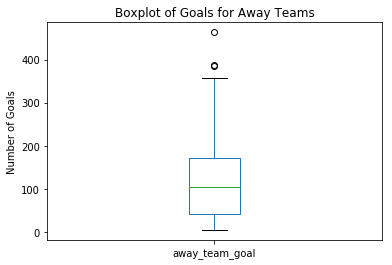

In [51]:
#creating a boxplot to observe the distribution of the number of goals for the away teams
match_all.groupby('away_team_short_name').sum().away_team_goal.plot.box()

plt.ylabel('Number of Goals')
plt.title('Boxplot of Goals for Away Teams')

When comparing between upper limits for home and away teams, there is a significant difference between both of them. Where home is 700 and away is 400. This indicates difference in how teams perform when they play home or away. 
Another interesting trend is that most of teams scored between 0 and 200 goals for all seasons included, this indicates that there are so many teams with low level and countable (very few) teams that make it to the big numbers. This maybe deduced because talented and skilled players get transferred to the top teams always making the weak ones always weak.

## Conclusions

* So it is clearly seen that the number of wins at home is always higher than the mmatches played away. This could raise an idea about the mental state and readiness of the team when they play on their home stadium.

* There is a direct logical relationship between the number of matches in the league and the total number of goals scored in that leaugue and the interesting thing is it doesn't matter if it's home or away.

* Clearly, Real Madrid and Barcelona are leading the entire teams home and away. However, it's clear that the home goals are much more than the away goals. 

* It's clear that the distribution of the goals scored at home is positively skewed indicating more clustering around the left tail of the distribution. Whereas the goals scored by away team had a mean around the 100s.

## Limitations

* The tables include a lot of columns, for example, the Match table contains 115 columns, most of which do not have a sufficient description of what they are for.

* Choosing the columns that will be used in the analysis. With so little information about the dataset, particularly the columns, it was difficult to limit the analysis to the columns that were obvious and made sense.